In [ ]:
!pip install spectral

     |████████████████████████████████| 184 kB 24.4 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=5b419453f32fd4b6ee2216346527aa5c25940d2a850a189fc6a57770b7f85639
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
 from spectral import *
 from scipy.stats import chi2
 import tifffile as tif
 import matplotlib.pyplot as plt

In [ ]:
# Leitura da imagem
img = tif.imread('/content/cubo_L7.tif')
imshow(img, (2,3,1), stretch=(0.02))

In [ ]:
# Cálculo do RX com janela de background de 21 x 21 e de exclusão de 5 x 5
rxvals = rx(img, window=(5,21))

# Visualização dos pixels onde RX tem uma probabilidade de menos de 0,001 em relação ao fundo
nbands = img.shape[-1]
P = chi2.ppf(0.999, nbands)
imshow(1 * (rxvals > P))

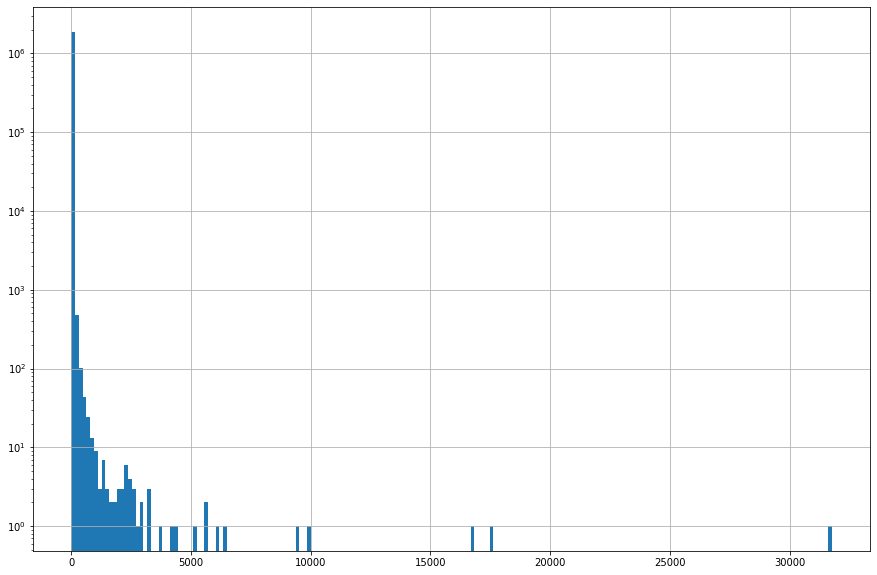

In [ ]:
# Visualização do histograma dos RX
plt.figure()
plt.hist(rxvals.ravel(), 200, log=True)
plt.grid()